# Stock prediction using statistical methods

- ARIMA
- SARIMA
- SARIMAX (Optional)
- VAR (Vector Autoregression) - USE MACROECONOMIC DATA

Key Considerations:
Stationarity: Most statistical models assume stationary data. Transform non-stationary data with differencing or log transformations.
Noise and Volatility: Stocks are subject to random shocks; pure statistical methods may struggle with extreme events.
Data Frequency: Choose a frequency (daily, hourly, etc.) appropriate for your analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts 


STOCKS_FOLDER = "stocks"
MACROECOMOMIC_US_FOLDER = "macroeconomic_us"
MACROECOMOMIC_GLOBAL_FOLDER = "macroeconomic_global"
COMMODITY_FOLDER = "commodity"

In [3]:
from darts import TimeSeries
import pandas as pd

data = pd.read_csv(f"{COMMODITY_FOLDER}/COPPER.csv")

#rename CORN to Price
data = data.rename(columns={"COPPER": "Price"})

#rename timestamp to Date
data = data.rename(columns={"timestamp": "Date"})

# drop rows containing only  . in the column
data = data[data['Price'] != '.']
data['Price'] = data['Price'].astype(float)

# split first 36 rows for testing
Test = data.iloc[:36]
Train = data.iloc[35:]


In [4]:
# create a TimeSeries

series = TimeSeries.from_dataframe(Train, 'Date', ['Price'])
real_series = TimeSeries.from_dataframe(Test, 'Date', ['Price'])

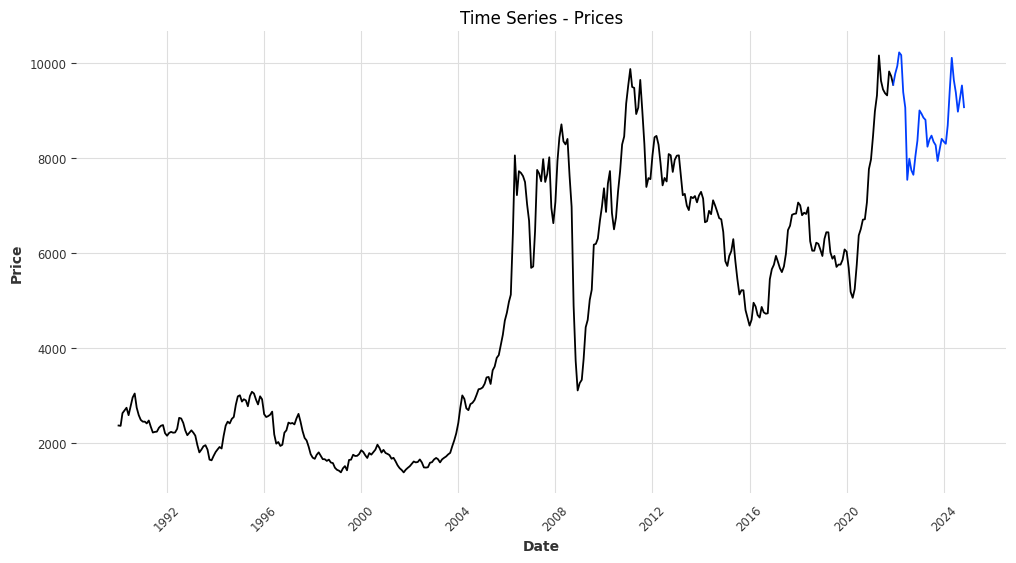

In [5]:
#plot using matplotlib

def plot_series(series, real_series, prediction=None):
    # Extract time index and values
    times = series.time_index
    values = series.values()

    times_real = real_series.time_index
    values_real = real_series.values()

    if prediction is not None:
        times_pred = prediction.time_index
        values_pred = prediction.values()

    # Plot using matplotlib
    plt.figure(figsize=(12,6))
    plt.plot(times, values)
    plt.plot(times_real, values_real)
    if prediction is not None:
        plt.plot(times_pred, values_pred, color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Time Series - Prices')
    plt.xticks(rotation=45) 

    # Display the plot
    plt.show()

plot_series(series, real_series)


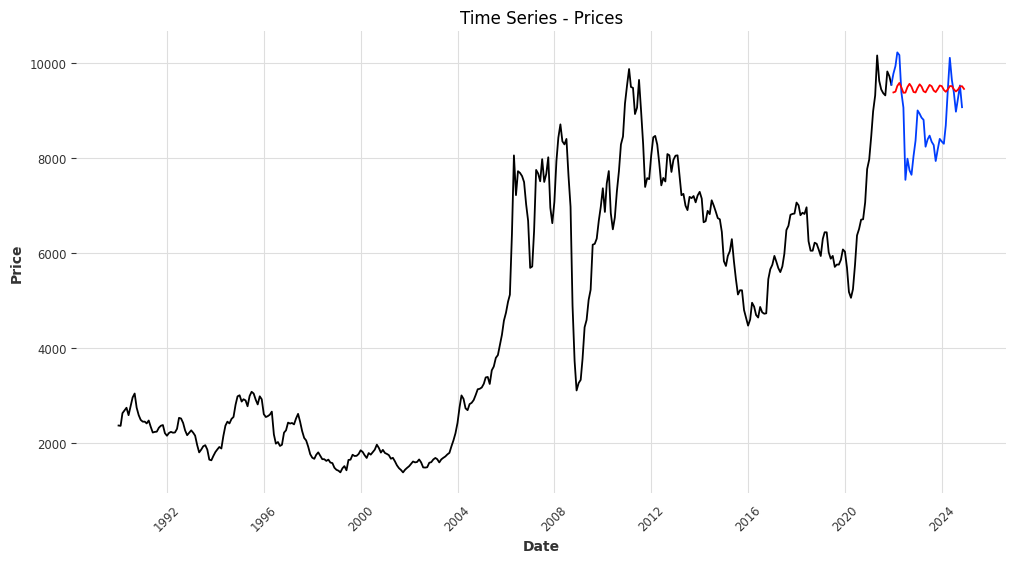

In [6]:
# forecast using autoARIMA

from darts.models import StatsForecastAutoARIMA 

# Fill or interpolate missing values in the series

model = StatsForecastAutoARIMA()
model.fit(series)
prediction = model.predict(36)


plot_series(series, real_series, prediction)


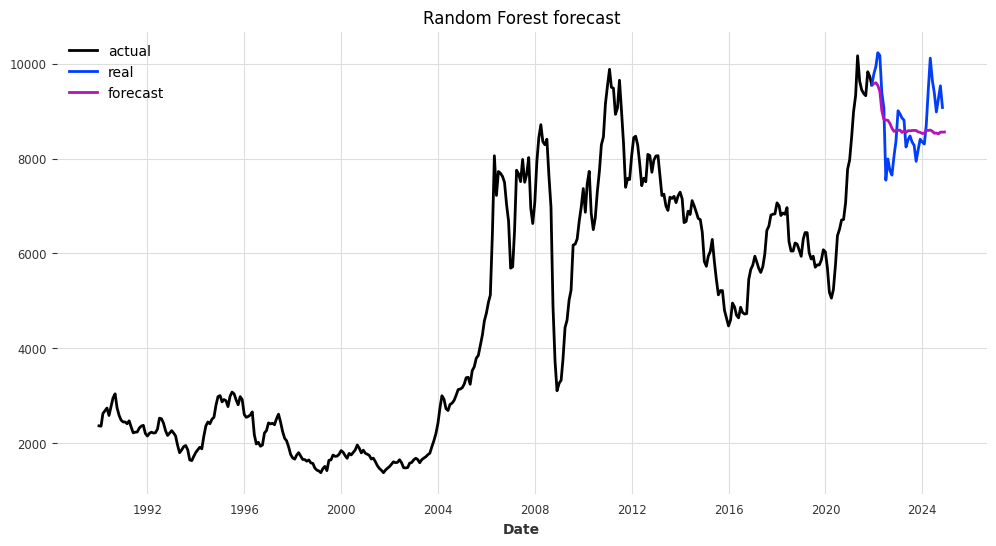

In [37]:
from darts.models import RandomForest

model = RandomForest(lags=250)
model.fit(series)
prediction = model.predict(36)
plt.figure(figsize=(12,6))
series.plot(label='actual')
real_series.plot(label='real')
prediction.plot(label='forecast', lw=2)
plt.title('Random Forest forecast')
plt.legend()


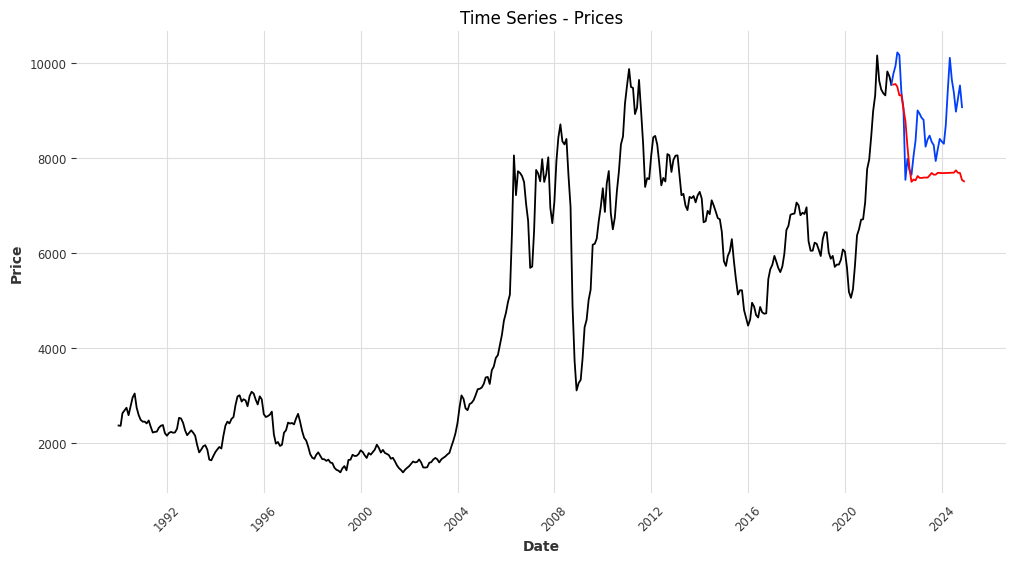

In [40]:
# forecast USING XGBoost

from darts.models import XGBModel

model = XGBModel(lags=250)
model.fit(series)
prediction = model.predict(36)

plot_series(series, real_series, prediction)

19:46:18 - cmdstanpy - INFO - Chain [1] start processing
19:46:18 - cmdstanpy - INFO - Chain [1] done processing


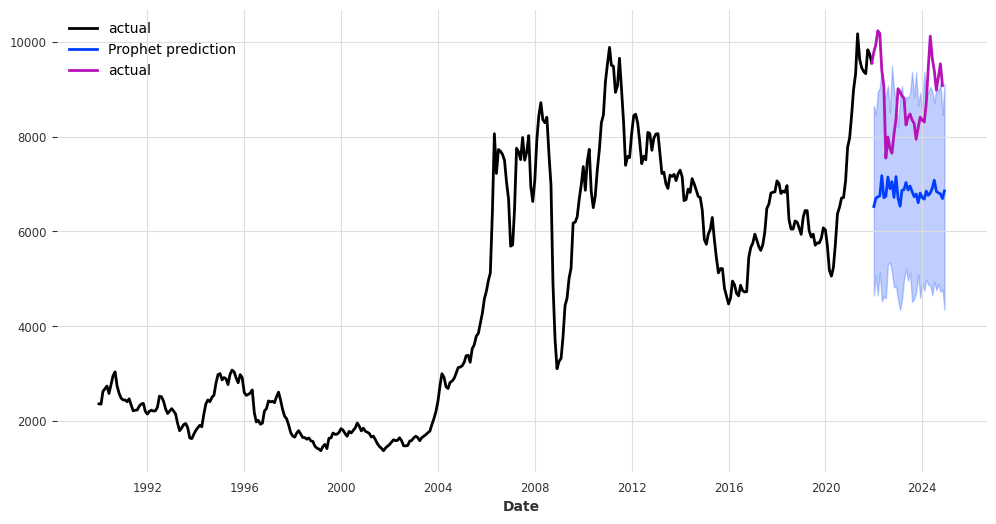

19:46:18 - cmdstanpy - INFO - Chain [1] start processing
19:46:19 - cmdstanpy - INFO - Chain [1] done processing


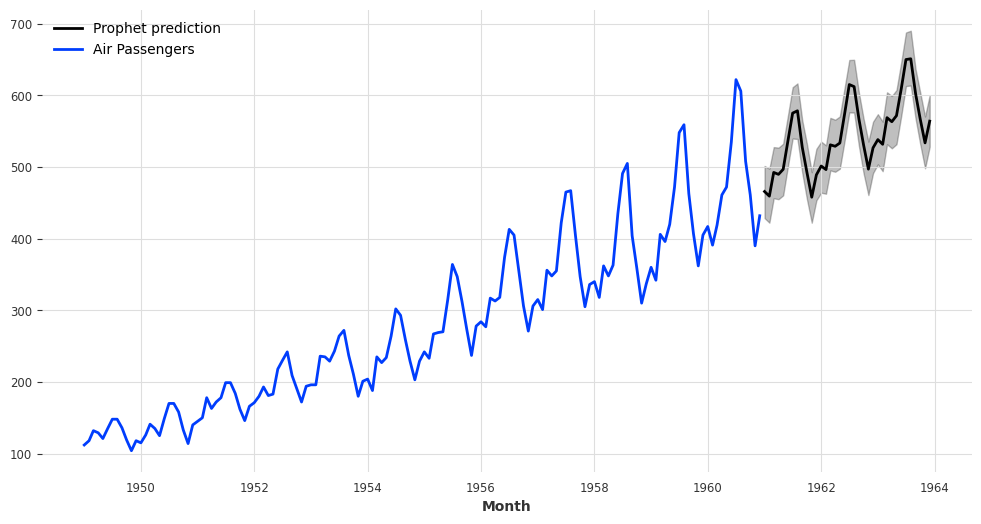

In [27]:
# forecast using Prophet

from darts.models import Prophet
from darts.datasets import AirPassengersDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries

model = Prophet()
model.fit(series)
prediction = model.predict(36, num_samples=100)

plt.figure(figsize=(12, 6))
series.plot(label='actual')
prediction.plot(label='Prophet prediction')
real_series.plot(label='actual')
plt.legend()
plt.show()

# Prophet on air passenger dataset
series_ap = AirPassengersDataset().load()

# Generate future covariates for the same time range as series_ap
future_cov = datetime_attribute_timeseries(series_ap, "month", cyclic=True, add_length=36)

model = Prophet()
model.fit(series_ap, future_covariates=future_cov)
pred = model.predict(36, future_covariates=future_cov, num_samples=1000)

plt.figure(figsize=(12, 6))
pred.plot(label='Prophet prediction')
series_ap.plot(label='Air Passengers')

plt.legend()
plt.show()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11499
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 250
[LightGBM] [Info] Start training from score 6897.768183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

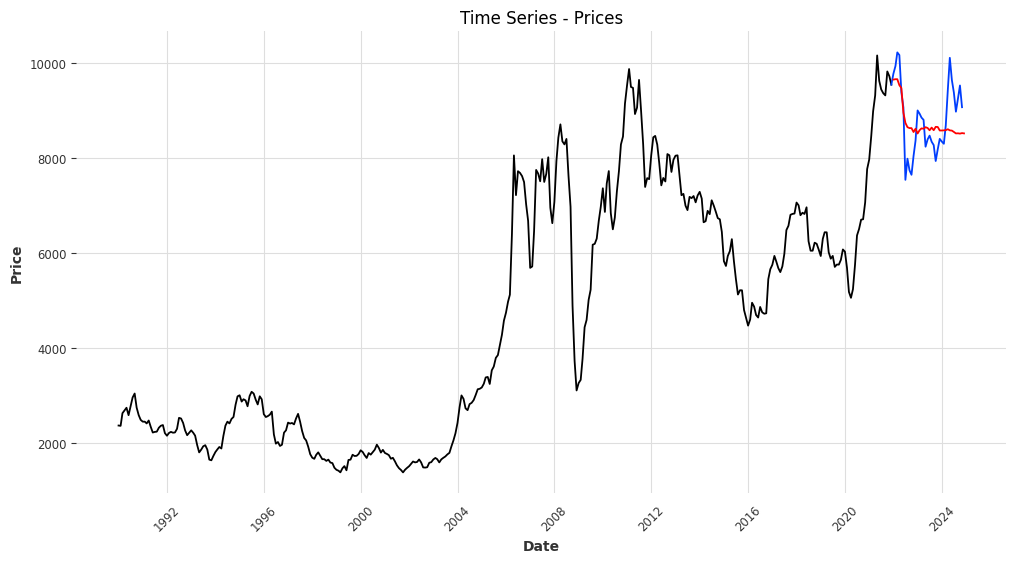

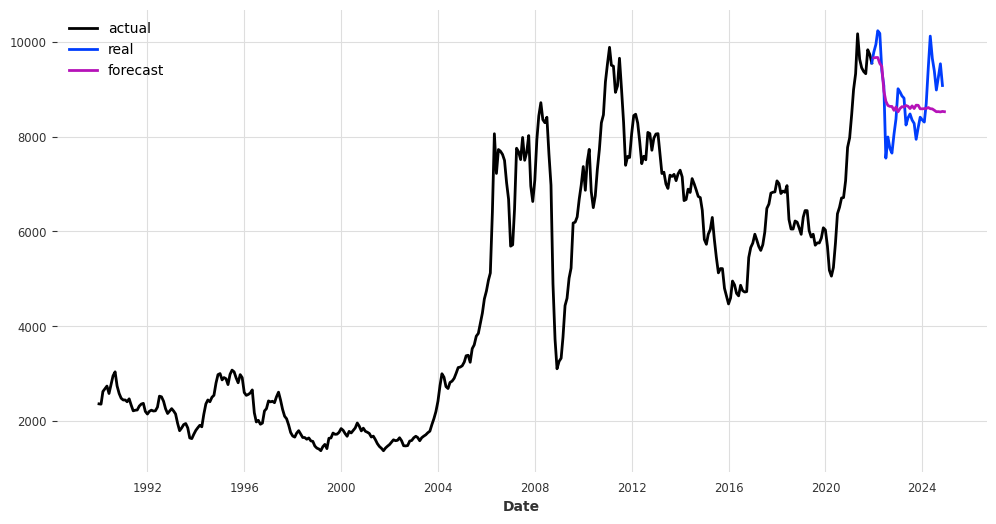

In [42]:
#LightGBM

from darts.models import LightGBMModel

model = LightGBMModel(lags=250)
model.fit(series)
prediction = model.predict(36)

plot_series(series, real_series, prediction)

plt.figure(figsize=(12, 6))
series.plot(label='actual')
real_series.plot(label='real')
prediction.plot(label='forecast', lw=2)
plt.legend()

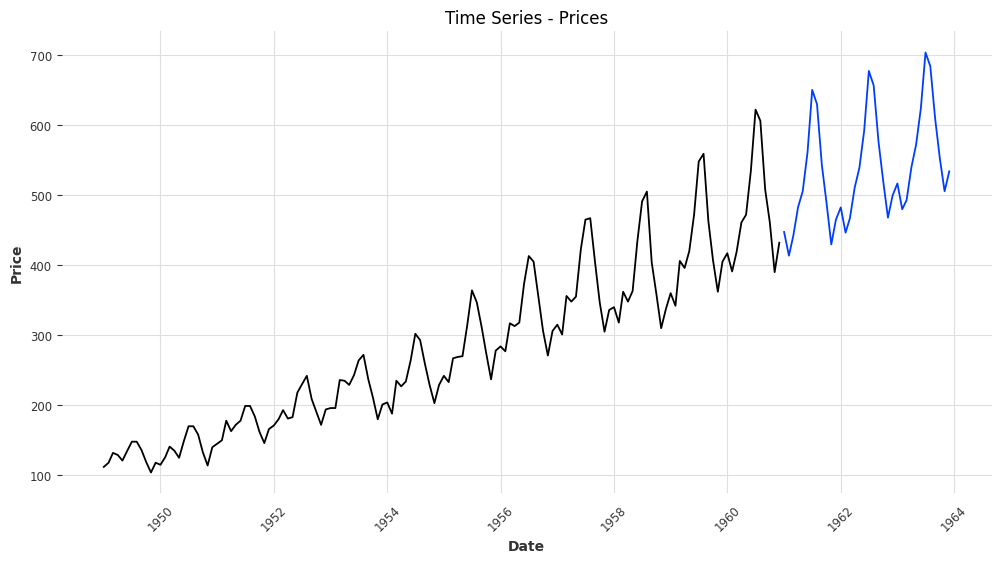

In [11]:
# auoarima on air passenger dataset

from darts.datasets import AirPassengersDataset
from darts.models import AutoARIMA

model = AutoARIMA(start_p=8, max_p=12, start_q=1)

series_ap = AirPassengersDataset().load()

model.fit(series_ap)
prediction = model.predict(36)

plot_series(series_ap, prediction)


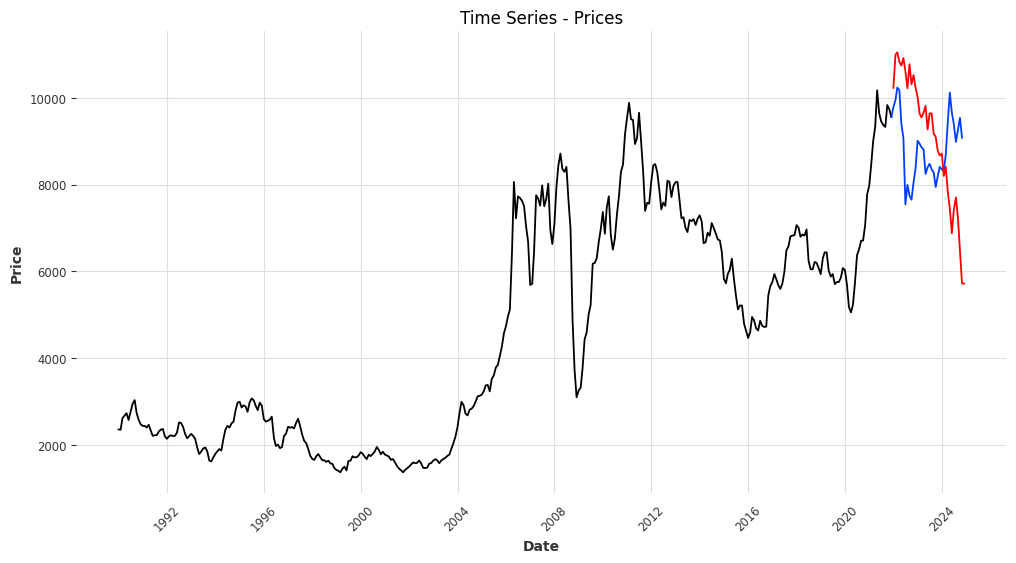

<Axes: xlabel='Date'>

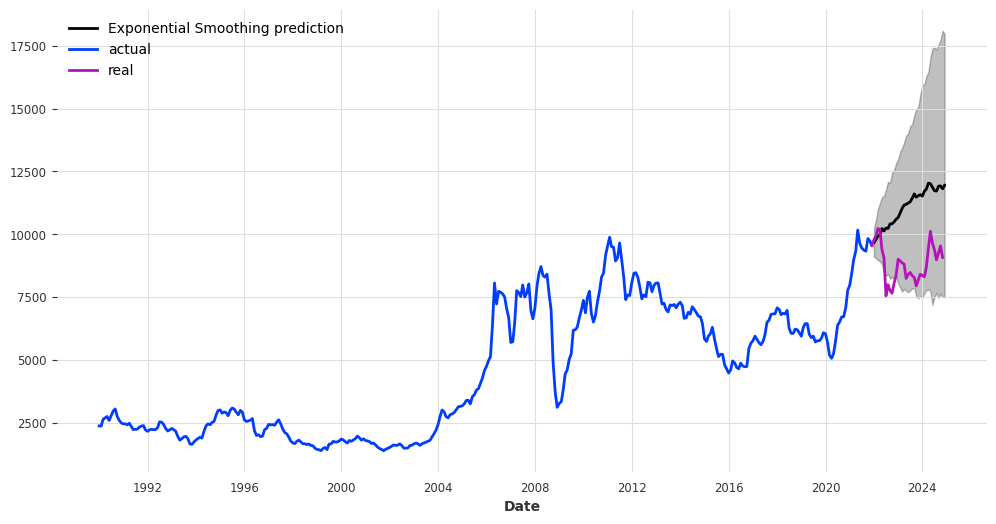

In [28]:
#exopnential smoothing

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(series)
prediction = model.predict(36, num_samples=100)

plot_series(series, real_series, prediction)

plt.figure(figsize=(12,6))
prediction.plot(label='Exponential Smoothing prediction')
series.plot(label='actual')
real_series.plot(label='real')


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
24.972    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=40` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

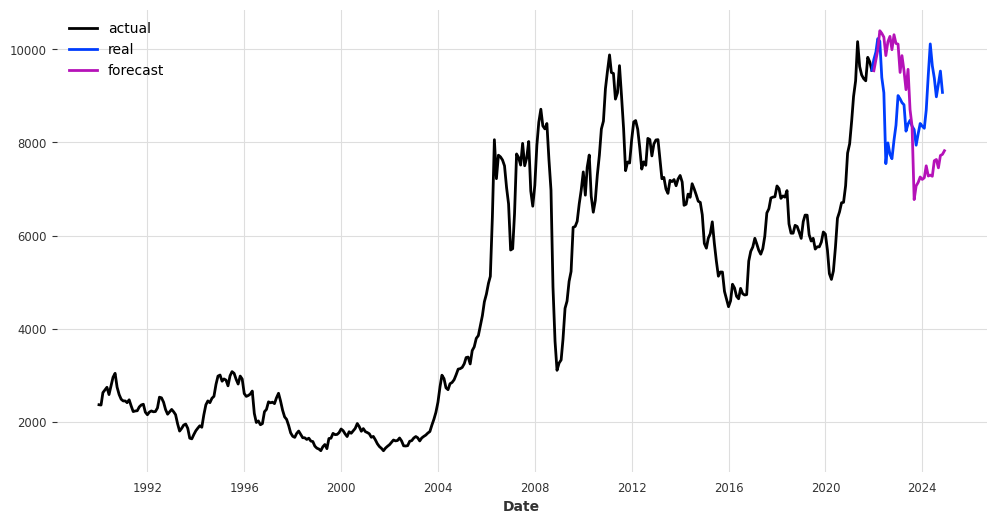

In [49]:
# N-beats

from darts.models import NBEATSModel

model = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    n_epochs=40,
    activation='LeakyReLU'
)
model.fit(series)
prediction = model.predict(36)

plt.figure(figsize=(12, 6))
series.plot(label='actual')
real_series.plot(label='real')
prediction.plot(label='forecast', lw=2)
plt.legend()

<Axes: xlabel='Date'>

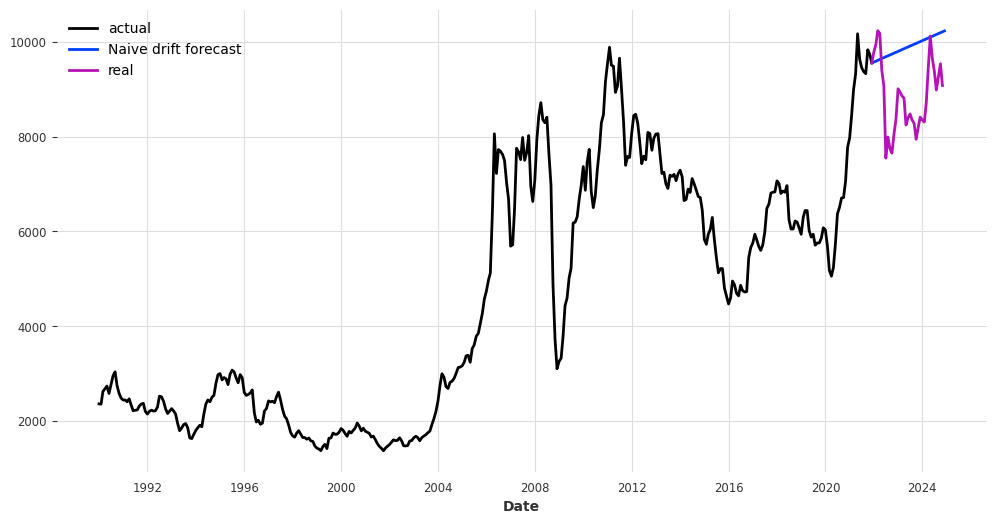

In [ ]:
# naive drift

from darts.models import NaiveDrift

model = NaiveDrift()

model.fit(series)
prediction = model.predict(36)

plt.figure(figsize=(12, 6))
series.plot(label='actual')
prediction.plot(label='Naive drift forecast')
real_series.plot(label='real')


In [15]:
%pip install arch

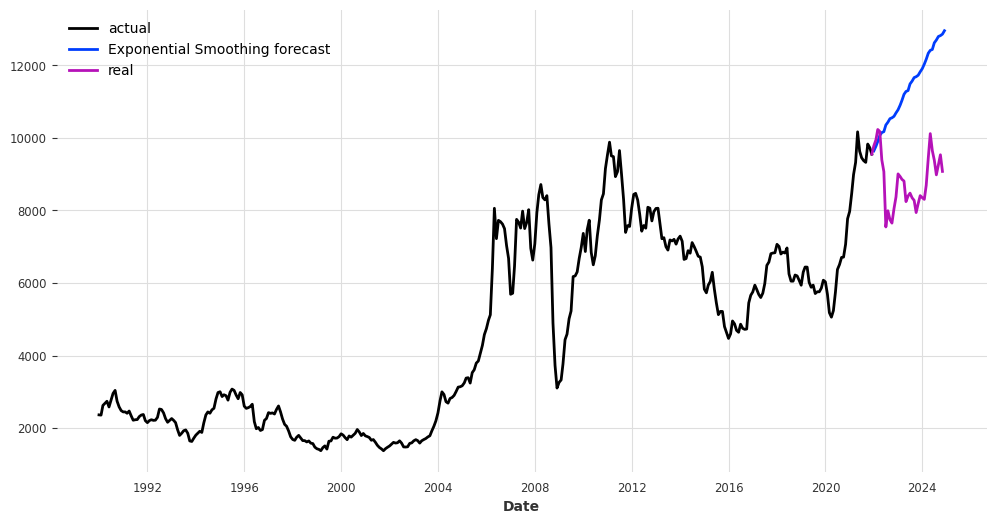

In [22]:
#exponential smoothing
#Q: IS it SES? 
#A: Yes, SES is a special case of exponential smoothing with a single parameter (alpha).

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()

model.fit(series)

prediction = model.predict(36)

plt.figure(figsize=(12, 6))
series.plot(label='actual')
prediction.plot(label='Exponential Smoothing forecast')
real_series.plot(label='real')
plt.legend()


c:\Users\Sebastian\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.1 M  | train
6 | V               | Linear           | 513    | train
-------------------------------------------------------------
1.1 M     Trainable para

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

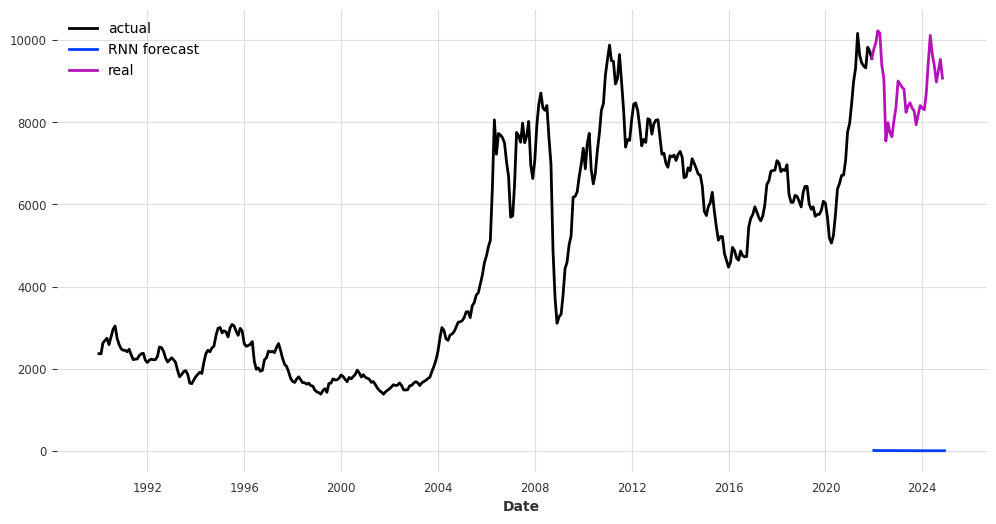

In [46]:
# RNN

from darts.models import RNNModel

#scale the series

from darts.utils.ts_utils 

model = RNNModel(
    model='LSTM',
    hidden_dim=512,
    dropout=0.1,
    batch_size=64,
    n_epochs=20,
    optimizer_kwargs={'lr': 1e-3},
    input_chunk_length=250,
    training_length=300,
)

model.fit(series)
prediction = model.predict(36)

plt.figure(figsize=(12, 6))
series.plot(label='actual')
prediction.plot(label='RNN forecast')
real_series.plot(label='real')
plt.legend()


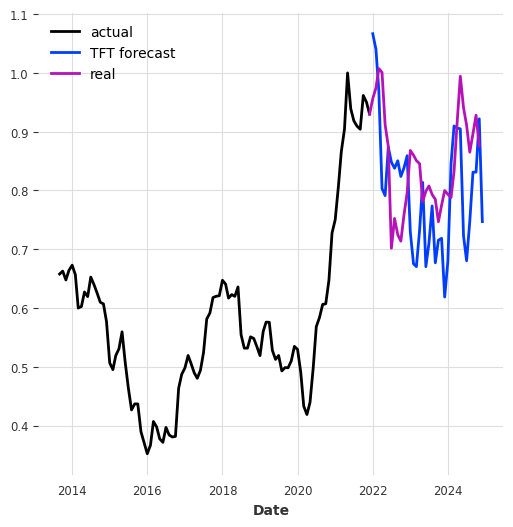

In [ ]:
#tft

from darts.models import TFTModel
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()

scaled_series = scaler.fit_transform(series)
real_series_scaled = scaler.transform(real_series)

model = TFTModel(
    input_chunk_length=12,
    output_chunk_length=1,
    n_epochs=80,
    batch_size=32,
    add_relative_index=True,
)

model.fit(scaled_series)
prediction = model.predict(36)


plt.figure(figsize=(12, 6))
scaled_series[-100:].plot(label='actual')
prediction.plot(label='TFT forecast')
real_series_scaled.plot(label='real')
plt.legend()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 11.7 K | train
-------------------------------------------------------------
11.7 K    Trainable params
0         Non-trainable params
11.7 K    Total params
0.047     Total estimated model params size (MB)
33        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=60` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

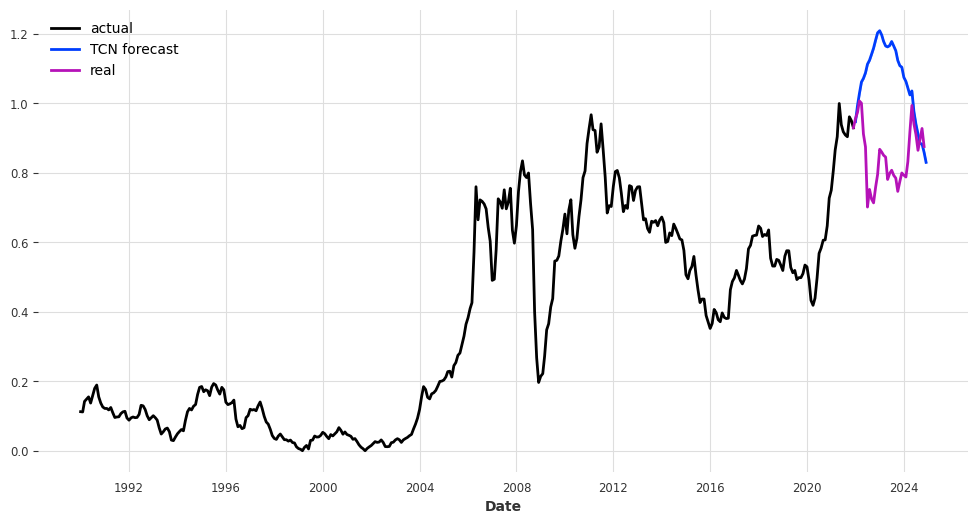

In [167]:
#TCN 

from darts.models import TCNModel
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()

scaled_series = scaler.fit_transform(series)
real_series_scaled = scaler.transform(real_series)

model = TCNModel(
    input_chunk_length=200,
    output_chunk_length=36,
    n_epochs=60,
    dilation_base=2,
    batch_size=32,
    kernel_size=150,
    num_filters=3,
    num_layers=5,

)

model.fit(scaled_series)
prediction = model.predict(36, num_samples=100)

plt.figure(figsize=(12, 6))
scaled_series.plot(label='actual')
prediction.plot(label='TCN forecast')
real_series_scaled.plot(label='real')
plt.legend()
